__Laure FEUILLET__

Etudiante 4ème année INSA Toulouse, France – Informatique et Réseaux

Skype : Laure Feuillet (laure97.feuillet@orange.fr)

# Voyages à vélo

### Problème

Catégoriser les utilisateurs d'un service de partage de vélos.

### Données

 https://s3.amazonaws.com/capitalbikeshare-data/index.html ->  2017-capitalbikeshare-tripdata.zip

### Choix 

* Données de l'année 2017 : Année complète et récente.
* Suppression du numéro de vélo, car il ne constitue pas un critère de choix pour les utilisateurs du service.
* Suppression des noms des stations, que nous identifierons par leur numéro.
* Remplacement des dates par le trimestre auquel elles appartiennent (Q1, Q2, Q3 ou Q4).
* Utilisation de Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import affichage_donnees as ad
from sklearn import decomposition
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, fcluster

In [2]:
q1 = pd.read_csv("2017Q1-capitalbikeshare-tripdata.csv")
q1["Q"] = 1
q2 = pd.read_csv("2017Q2-capitalbikeshare-tripdata.csv")
q2["Q"] = 2
q3 = pd.read_csv("2017Q3-capitalbikeshare-tripdata.csv")
q3["Q"] = 3
q4 = pd.read_csv("2017Q4-capitalbikeshare-tripdata.csv")
q4["Q"] = 4

#### Allure des données

In [3]:
q1.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Q
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member,1
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual,1
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual,1
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual,1
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual,1


In [4]:
q3.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Q
0,2762,2017-07-01 00:01:09,2017-07-01 00:47:11,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,W21474,Casual,3
1,2763,2017-07-01 00:01:24,2017-07-01 00:47:27,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,W22042,Casual,3
2,690,2017-07-01 00:01:45,2017-07-01 00:13:16,31122,16th & Irving St NW,31299,Connecticut Ave & R St NW,W01182,Member,3
3,134,2017-07-01 00:01:46,2017-07-01 00:04:00,31201,15th & P St NW,31267,17th St & Massachusetts Ave NW,W22829,Member,3
4,587,2017-07-01 00:02:05,2017-07-01 00:11:52,31099,Madison & N Henry St,31907,Franklin & S Washington St,W22223,Casual,3


#### Fusion et reformulation des données

In [5]:
donnees=[q1, q2, q3, q4]
donnees = pd.concat(donnees,ignore_index=True)
del donnees["Bike number"]
del donnees["Start station"]
del donnees["End station"]
del donnees["Start date"]
del donnees["End date"]

In [6]:
donnees.head()

,Duration,Start station number,End station number,Member type,Q
0,221,31634,31208,Member,1
1,1676,31258,31270,Casual,1
2,1356,31289,31222,Casual,1
3,1327,31289,31222,Casual,1
4,1636,31258,31270,Casual,1


In [7]:
remplacement =  {"Member": 1, "Casual": -1}
donnees["New member type"] =donnees["Member type"].replace(remplacement)
del donnees["Member type"]
donnees.head()

,Duration,Start station number,End station number,Q,New member type
0,221,31634,31208,1,1
1,1676,31258,31270,1,-1
2,1356,31289,31222,1,-1
3,1327,31289,31222,1,-1
4,1636,31258,31270,1,-1


In [14]:
donnees.describe(include="all")

,Duration,Start station number,End station number,Q,New member type
count,3.757777e+06,3.757777e+06,3.757777e+06,3.757777e+06,3.757777e+06
mean,1.153367e+03,3.132043e+04,3.132113e+04,2.578960e+00,4.774581e-01
std,2.121272e+03,2.206445e+02,2.181511e+02,1.010824e+00,8.786546e-01
min,6.000000e+01,3.100000e+04,3.100000e+04,1.000000e+00,-1.000000e+00
25%,4.100000e+02,3.120500e+04,3.121100e+04,2.000000e+00,-1.000000e+00
50%,7.100000e+02,3.125500e+04,3.125400e+04,3.000000e+00,1.000000e+00
75%,1.226000e+03,3.150200e+04,3.150000e+04,3.000000e+00,1.000000e+00
max,8.639400e+04,3.222500e+04,3.222500e+04,4.000000e+00,1.000000e+00


In [16]:
donnees[donnees["Q"] == 2].head()

,Duration,Start station number,End station number,Q,New member type
646510,381,31238,31202,2,1
646511,590,31109,31278,2,1
646512,2938,31289,31238,2,-1
646513,380,31121,31104,2,1
646514,423,31023,31034,2,1


### APC

= Analyse en composantes principales

* Variabilité entre individus
* Liaisons entre variables

C:\Users\lkili\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\lkili\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


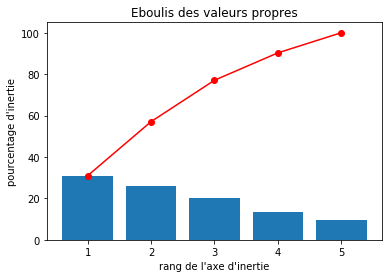

In [8]:
# choix du nombre de composantes à calculer
n_comp = 5

# préparation des données pour l'ACP
X = donnees.values
names = donnees.index 
features = donnees.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
ad.display_scree_plot(pca)

D'après l'éboulis des valeurs propres, il est pertinent de  garder 3 axes d'inertie, qui représentent environ 80% de l'intertie totale (critère de Keiser).

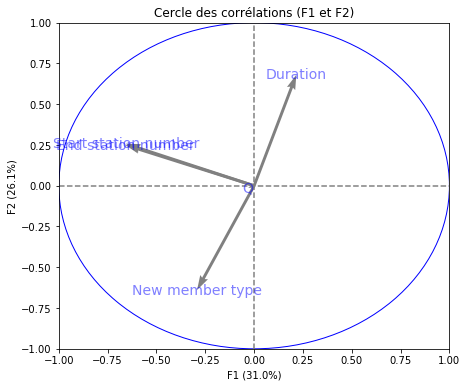

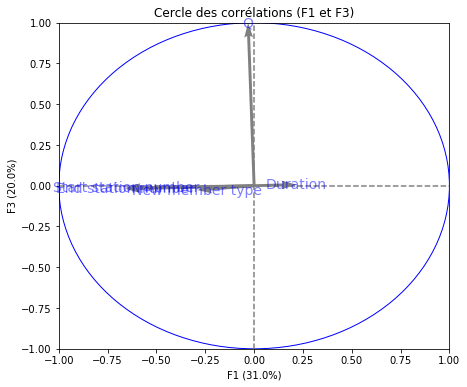

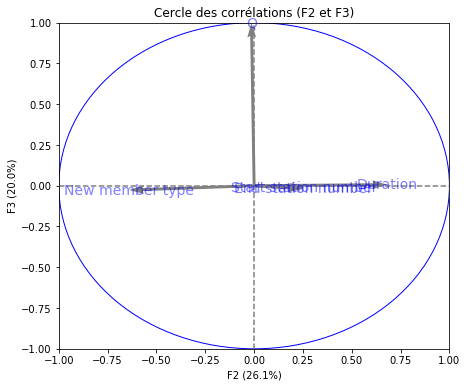

In [9]:
# Cercle des corrélations
pcs = pca.components_
ad.display_circles(pcs, n_comp, pca, [(0,1),(0,2),(1,2)], labels = np.array(features))

F1 -> Stations utilisées

F2 -> Durée (positivement) + Type de membre (négativement).
Ainsi, plus un trajet est long, plus il y a de chances que l'utilisateur soit occasionnel, et inversement.

F3 -> Q : Période de l'année

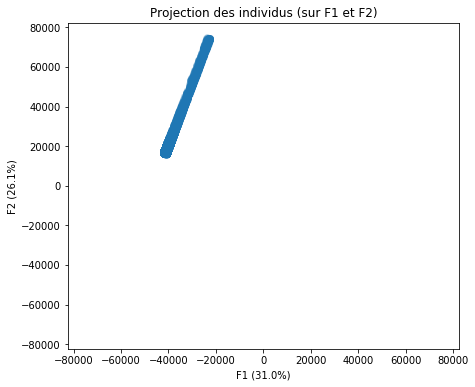

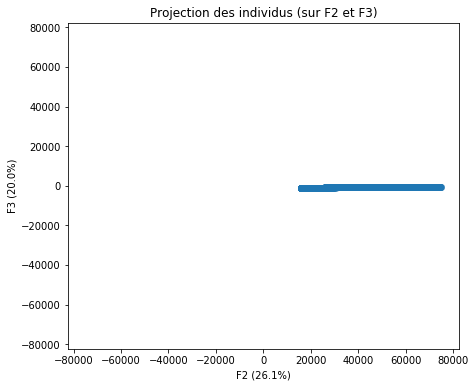

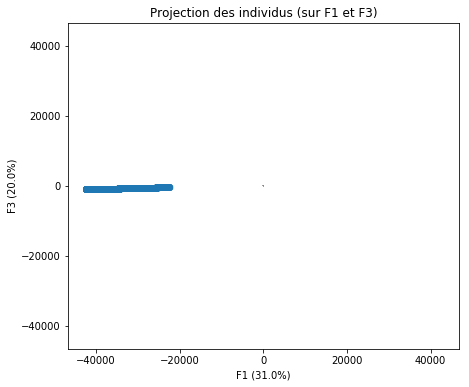

In [10]:
# Projection des individus
X_projected = pca.transform(X)
ad.display_factorial_planes(X_projected, 3, pca, [(0,1),(1,2),(0,2)], alpha = 0.2)

plt.show()

Tout d'abord, on remarque que les individus (trajets ici) sont répartis linéairement sur chaque projection. Ainsi chaque type de trajet est réparti uniformément sur l'ensemble des trajets effectués. 

__Projection des individus sur F1 et F2__ : 
Les utilisateurs d'une certaine station sont toujours du même type et utilisent un vélo pendant la même durée.

__Projection des individus sur F2 et F3__ :

__Projection des individus sur F1 et F3__ : 

### Algorithme k-means

Clustering -> Segmenter les individus

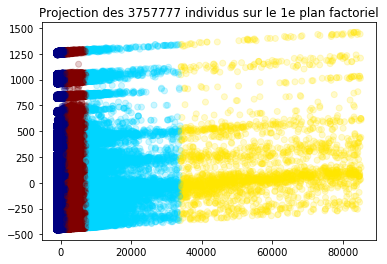

In [25]:
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 4

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

Il s'agit du 1er plan factoriel, qui correspond à (durée/membre) en fonction des stations. Il semble donc que l'algo k-means nous propose de regrouper les trajets, en fonctions de la station utilisée. Pourtant, puisqu'on reconnaît des sortes de lignes dans la projection, on aurait pu être tentés de les regrouper selon ces lignes.

#### Classification hiérarchique

2
3


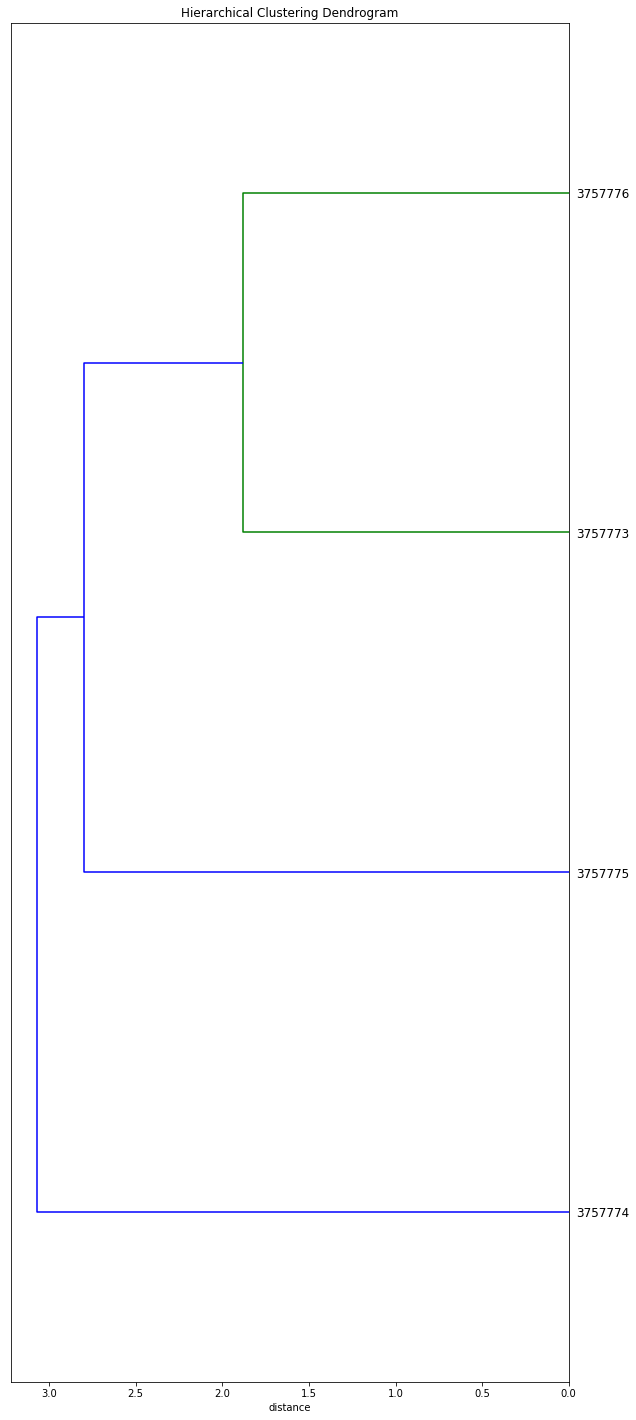

In [13]:
centres = km.cluster_centers_
# Clustering hiérarchique
Z = linkage(centres, 'ward')
# Affichage du dendrogramme
ad.plot_dendrogram(Z, names)

In [23]:
print(donnees.iloc[3757774, :])
print(donnees.iloc[3757775, :])
print(donnees.iloc[3757773, :])
print(donnees.iloc[3757776, :])

Duration                  393
Start station number    31209
End station number      31609
Q                           4
New member type             1
Name: 3757774, dtype: int64
Duration                 1319
Start station number    31102
End station number      31102
Q                           4
New member type             1
Name: 3757775, dtype: int64
Duration                  399
Start station number    31125
End station number      31110
Q                           4
New member type            -1
Name: 3757773, dtype: int64
Duration                  266
Start station number    31229
End station number      31119
Q                           4
New member type             1
Name: 3757776, dtype: int64


On a réalisé ici une classification hiérarchique sur les centres des clusters.

### Remarques supplémentaires

* Etudier l'horaire de l'utilisation, en fonction des horaires de travail ou de la nuit par exemple, afin d'en déduire le type d'utilisation, pour le travail par exemple, on en complément des transports en commun la nuit...
* Prendre en compte plusieurs années, pour analyser l'évolution de l'utilisation de ce service.

Avec l'aide des cours Openclassrooms : 
* https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees 
* https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science 